In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.orm import sessionmaker

In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.measurement

In [8]:
# Create a session
Session = sessionmaker(bind=engine)
session = Session()

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(most_recent_date)

2017-08-23


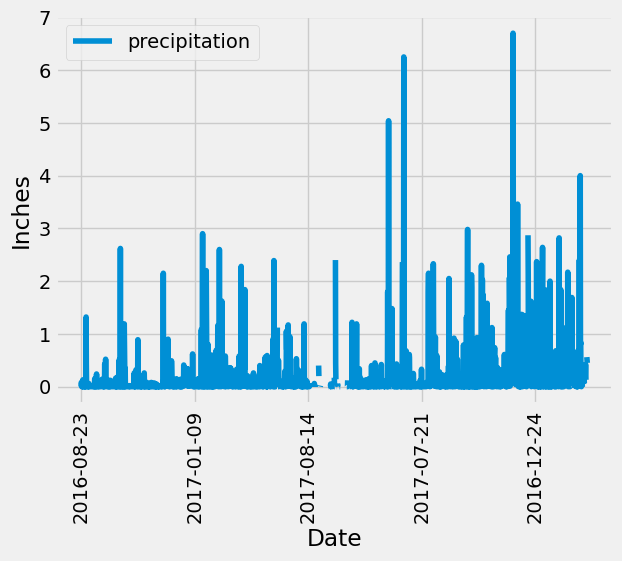

<Figure size 1000x600 with 0 Axes>

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
most_recent_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= most_recent_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_df = pd.DataFrame(last_12_months, columns=['date', 'precipitation'])

# Sort the dataframe by date
date_df_sorted = date_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
date_df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.figure(figsize=(10,6))
plt.savefig("output_data/Fig1.png")

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = date_df['precipitation'].describe()
print(summary_statistics)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations_df = pd.read_csv('Resources/hawaii_measurements.csv')
total_stations = total_stations_df['station'].nunique()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active_stations= total_stations_df.groupby('station').size().reset_index(name='count')

most_active_stations = most_active_stations.sort_values(by='count', ascending=False)

print(most_active_stations)

       station  count
6  USC00519281   2772
7  USC00519397   2724
1  USC00513117   2709
8  USC00519523   2669
3  USC00516128   2612
2  USC00514830   2202
0  USC00511918   1979
4  USC00517948   1372
5  USC00518838    511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stations_data = total_stations_df[total_stations_df['station'] == 'USC00519281']
lowest_temperature = most_active_stations_data['tobs'].min()
highest_temperature = most_active_stations_data['tobs'].max()
average_temperature = most_active_stations_data['tobs'].mean()

print(f"Lowest Temperature: {lowest_temperature}")
print(f"Highest Temperature: {highest_temperature}")
print(f"Average Temperature: {average_temperature}")

Lowest Temperature: 54
Highest Temperature: 85
Average Temperature: 71.66378066378067


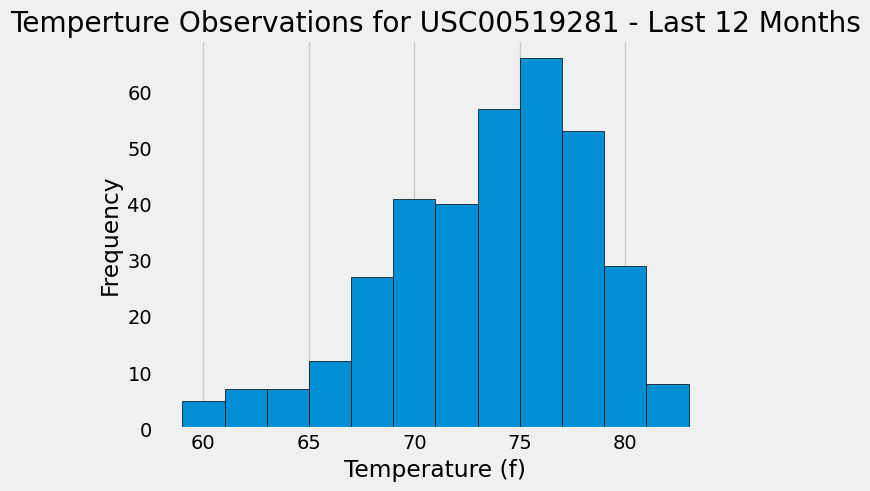

<Figure size 1000x600 with 0 Axes>

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_recent_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_12_months = session.query(Station.tobs).filter(Station.station=='USC00519281').filter(Station.date >= last_recent_date).all()
most_active_df = pd.DataFrame(last_12_months, columns=['tobs'])
most_active_df_sorted = date_df.sort_values(by='date')

plt.hist(most_active_df['tobs'], bins=12, edgecolor='black')
plt.title('Temperture Observations for USC00519281 - Last 12 Months')
plt.xlabel('Temperature (f)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.figure(figsize=(10,6))
plt.savefig("output_data/Fig2.png")


# Close Session

In [16]:
# Close Session
session.close()
